In [2]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import eit
import pandas as pd
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif', serif='cm')

In [3]:
burn = 50000
frame = 14
ns = [4,5,6]
n_ref = 7
n_levels = 20
n_bdy = 32
n_sensor = 8

In [4]:
params_dict_ref = {}
with open(os.path.join('results/static_recovery_f{}_n={}'.format(frame, n_ref), 'params.py')) as f:
    exec(f.read(), {}, params_dict_ref)

In [5]:
plot_means = []
plot_stds = []

for n in ns:
    results = np.load('results/static_recovery_f{}_n={}/results.npy'.format(frame, n))
    results = np.exp(results[burn:])
    
    mean = np.mean(results,axis=0)
    std = np.std(results, axis=0)
    
    plot_means.append(mean)
    plot_stds.append(std)

In [6]:
ref_results = np.load('results/static_recovery_f{}_n={}_collocation/results.npy'.format(frame, n_ref))
ref_results = np.exp(ref_results[burn:])

ref_mean = np.mean(ref_results,axis=0)
ref_std = np.std(ref_results, axis=0)

In [7]:
max_level_mean = np.max([np.max(m) for m in plot_means + [ref_mean]])
min_level_mean = np.min([np.min(m) for m in plot_means + [ref_mean]])
max_level_std = np.max([np.max(m) for m in plot_stds + [ref_std]])
min_level_std = np.min([np.min(m) for m in plot_stds + [ref_std]])

mean_levels = np.linspace(min_level_mean, max_level_mean, n_levels)
std_levels = np.linspace(min_level_std, max_level_std, n_levels)

In [8]:
proposal_design = eit.grids.construct_shell(np.linspace(0,1,params_dict_ref['n_radii_inverse']))

In [9]:
def plot(mean, std, axes):
    axis = axes[0]
    im_mean = axis.tricontourf(proposal_design[:,0], proposal_design[:,1], mean, mean_levels, cmap='coolwarm')
    axis.set_aspect('equal')
    axis = axes[1]
    im_std = axis.tricontourf(proposal_design[:,0], proposal_design[:,1], std, std_levels, cmap='coolwarm')
    axis.set_aspect('equal')
    
    return im_mean, im_std

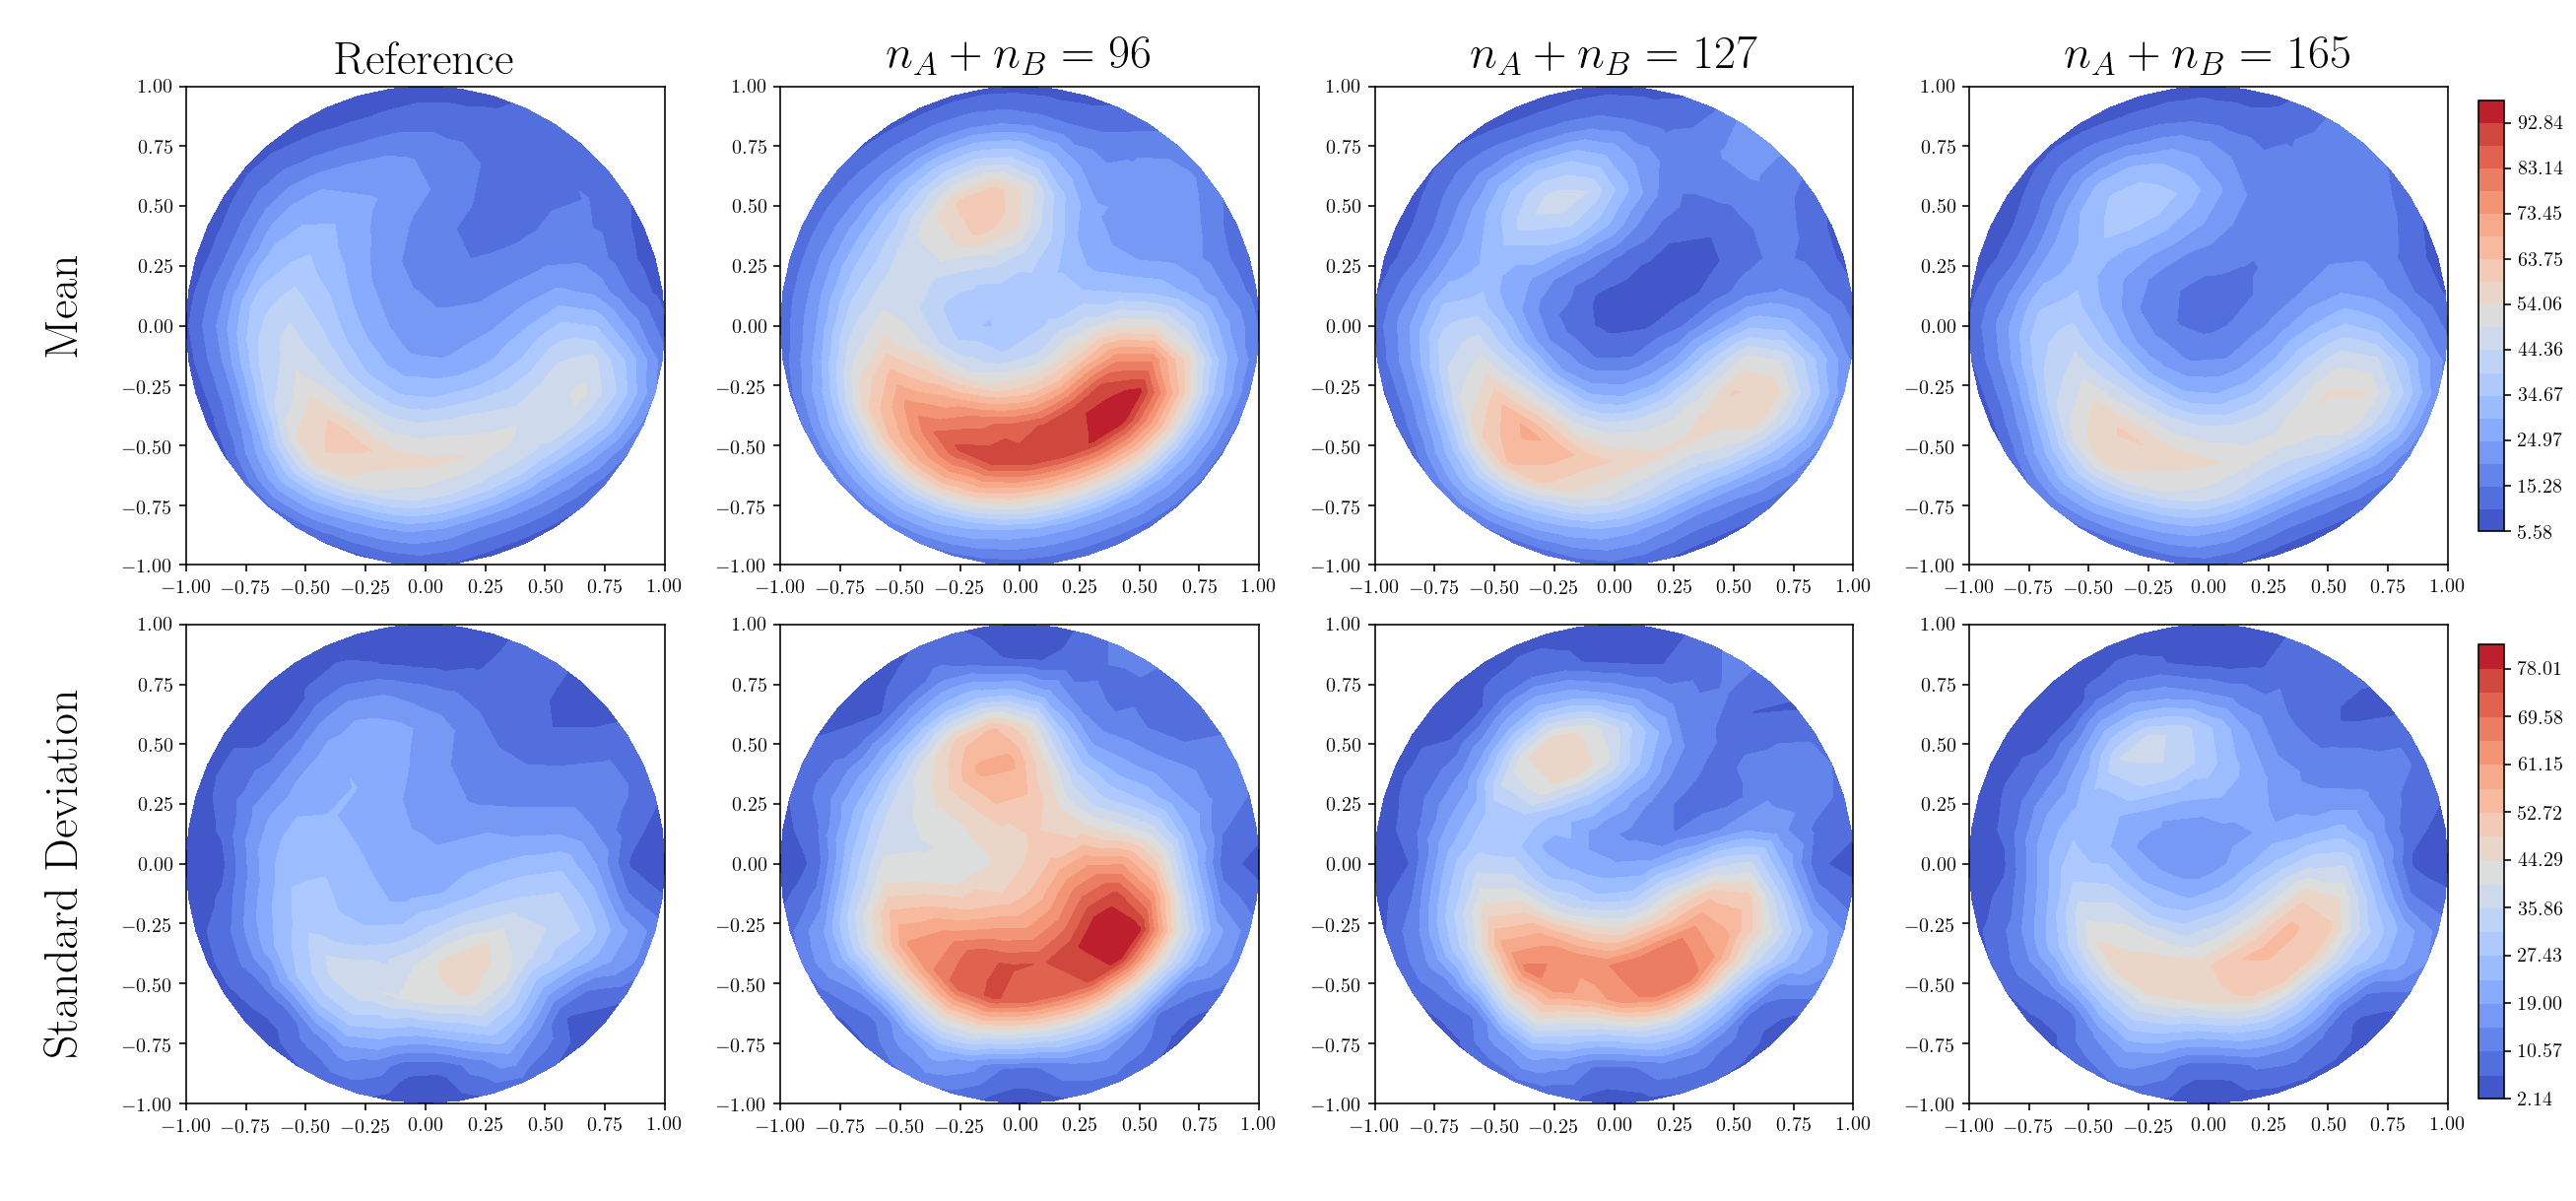

In [69]:
fig, axes = plt.subplots(2,4, figsize=(18,8))
for ax, n, mean, std in zip(axes[:,1:].T, ns, plot_means, plot_stds):
    plot(mean, std, ax)
    actual_n = len(eit.grids.construct_circular(n, n_bdy, n_sensor).all)
    #fig.savefig('figures/mean_std_n={}.pdf'.format(actual_n), bbox_inches='tight', transparent=True)
    ax[0].set_title('$n_A + n_B = {}$'.format(actual_n), fontsize=24)
im_mean, im_std = plot(ref_mean, ref_std, axes[:,0].T)
axes[0,0].set_title('Reference', fontsize=24, )
#fig.savefig('figures/mean_std_ref.pdf'.format(actual_n), bbox_inches='tight', transparent=True)

fig.tight_layout()
fig.subplots_adjust(left=0.04, right=0.95)

cax_mean = fig.add_axes([0.95, 0.55, 0.01, 0.38])
fig.colorbar(im_mean, cax_mean)

cax_std = fig.add_axes([0.95, 0.05, 0.01, 0.4])
fig.colorbar(im_std, cax_std)

cax_mean_label = fig.add_axes([0.0, 0.5, 0.01, 0.5])
cax_mean_label.axis('off')
cax_mean_label.text(0.5, 0.5, 'Mean', fontsize=24, 
                    transform=cax_mean_label.transAxes, horizontalalignment='center', 
                    verticalalignment='center', rotation=90)


cax_std_label = fig.add_axes([0.0, 0.0, 0.01, 0.5])
cax_std_label.axis('off')
cax_std_label.text(0.5, 0.5, 'Standard Deviation', fontsize=24, 
                    transform=cax_std_label.transAxes, horizontalalignment='center', 
                    verticalalignment='center', rotation=90)

fig.savefig('figures/mean_std.pdf'.format(actual_n), bbox_inches='tight', transparent=True)